# Pre-processing Overlay data for WaDE upload.
- Purpose: To preprocess state overlay data into one main file for simple DataFrame creation and extraction.

In [1]:
# Needed Libraries / Modules

# ---- working with data ----
import os  # native operating system interaction
import numpy as np  # mathematical array manipulation
import pandas as pd  # data structure and data analysis
import geopandas as gpd  # geo-data structure and data analysis

# ---- visualization ----
import matplotlib.pyplot as plt  # plotting library
import seaborn as sns  # plotting library

# ---- API data retrieval ----
import requests  # http requests
import json  # JSON parse

# ---- Cleanup ----
import re  # string regular expression manipulation
from datetime import datetime  # date and time manipulation
pd.set_option('display.max_columns', 999)  # How to display all columns of a Pandas DataFrame in Jupyter Notebook
pd.set_option('display.float_format', lambda x: '%.5f' % x)  # suppress scientific notation in Pandas

In [3]:
# ---- working directory ----
workingDirString = "G:/Shared drives/WaDE Data/WaDE Data Folder/Oregon/Overlays" # set working directory folder string here
os.chdir(workingDirString)
print(f'The working Directory is:', workingDirString)

The working Directory is: G:/Shared drives/WaDE Data/WaDE Data Folder/Oregon/Overlays


## Overlay Area Data #1

In [6]:
# Input File
inputFile = "RawInputData/shapefiles/oregon-water-resources-department-owrd-administrative-basins.zip"
dfin1 = gpd.read_file(inputFile).replace(np.nan, "")

# WaDE UUID tracker for data assessment
if 'WaDEUUID' not in dfin1:
    dfin1['WaDEUUID'] = "ov" + dfin1.index.astype(str)
    dfin1.to_csv('RawInputData/oregon-water-resources-department-owrd-administrative-basins.zip', compression=dict(method='zip', archive_name='oregon-water-resources-department-owrd-administrative-basins.csv'), index=False)

print(len(dfin1))
dfin1.head()

19


,BASIN_24,BASIN_24_I,BASIN_NUM,BASIN_NAME,SQ_MI,SHORTNAME,geometry,WaDEUUID
0,2.00000,1.00000,1,North Coast,2556.24000,norco,"POLYGON ((551528.312 1648986.750, 552702.375 1...",ov0
1,3.00000,2.00000,8,Grande Ronde,4919.97000,gron,"POLYGON ((1968356.250 1559735.750, 1969243.875...",ov1
2,4.00000,3.00000,7,Umatilla,4501.74000,uma,"POLYGON ((1603555.750 1521597.000, 1603574.000...",ov2
3,5.00000,4.00000,2,Willamette,11468.98000,will,"POLYGON ((825738.062 1396432.875, 826102.438 1...",ov3
4,6.00000,5.00000,6,John Day,8072.88000,jday,"POLYGON ((1431521.250 1461584.375, 1431330.625...",ov4


In [7]:
# create output for Regulatory Area #1 dataframe
df = pd.DataFrame()

# Data Assessment UUID
df['WaDEUUID'] = dfin1['WaDEUUID']

# Date Info
df['in_Date'] = "10/29/2024"
df['in_Year'] = "2024"

# Organization Info
df['in_OrganizationUUID'] = "ORov_O1"

# ReportingUnit Info
df['in_EPSGCodeCV'] = "4326"
df['in_ReportingUnitName'] = dfin1["BASIN_NAME"]
df['in_ReportingUnitNativeID'] = "or" + dfin1["BASIN_NUM"].astype(str)
df['in_ReportingUnitProductVersion'] = "9.6"
df['in_ReportingUnitTypeCV'] = "Administrative Basins"
df['in_ReportingUnitUpdateDate'] = "9/22/2021"
df['in_StateCV'] = "OR"
df['in_Geometry'] = ""

# RegulatoryOverlay Info
df['in_OversightAgency'] = "Oregon Water Resources Department"
df['in_RegulatoryDescription'] = "Administrative rules which establish water management policies and objectives and which govern the appropriation and use of the surface and ground water"
df['in_RegulatoryName'] = dfin1["BASIN_NAME"]
df['in_RegulatoryOverlayNativeID'] = "or" + dfin1["BASIN_NUM"].astype(str)
df['in_RegulatoryStatusCV'] = "Active"
df['in_RegulatoryStatute'] = ""
df['in_RegulatoryStatuteLink'] = "https://secure.sos.state.or.us/oard/displayDivisionRules.action?selectedDivision=3207"
df['in_StatutoryEffectiveDate'] = "10/7/1993"
df['in_StatutoryEndDate'] = ""
df['in_RegulatoryOverlayTypeCV'] = "Administrative Basins"
df['in_WaterSourceTypeCV'] = "Surface and Groundwater"

df = df.drop_duplicates().reset_index(drop=True)
outdf1 = df.copy()
print(len(outdf1))
outdf1.head()

19


,WaDEUUID,in_Date,in_Year,in_OrganizationUUID,in_EPSGCodeCV,in_ReportingUnitName,in_ReportingUnitNativeID,in_ReportingUnitProductVersion,in_ReportingUnitTypeCV,in_ReportingUnitUpdateDate,in_StateCV,in_Geometry,in_OversightAgency,in_RegulatoryDescription,in_RegulatoryName,in_RegulatoryOverlayNativeID,in_RegulatoryStatusCV,in_RegulatoryStatute,in_RegulatoryStatuteLink,in_StatutoryEffectiveDate,in_StatutoryEndDate,in_RegulatoryOverlayTypeCV,in_WaterSourceTypeCV
0,ov0,10/29/2024,2024,ORov_O1,4326,North Coast,or1,9.6,Administrative Basins,9/22/2021,OR,,Oregon Water Resources Department,Administrative rules which establish water man...,North Coast,or1,Active,,https://secure.sos.state.or.us/oard/displayDiv...,10/7/1993,,Administrative Basins,Surface and Groundwater
1,ov1,10/29/2024,2024,ORov_O1,4326,Grande Ronde,or8,9.6,Administrative Basins,9/22/2021,OR,,Oregon Water Resources Department,Administrative rules which establish water man...,Grande Ronde,or8,Active,,https://secure.sos.state.or.us/oard/displayDiv...,10/7/1993,,Administrative Basins,Surface and Groundwater
2,ov2,10/29/2024,2024,ORov_O1,4326,Umatilla,or7,9.6,Administrative Basins,9/22/2021,OR,,Oregon Water Resources Department,Administrative rules which establish water man...,Umatilla,or7,Active,,https://secure.sos.state.or.us/oard/displayDiv...,10/7/1993,,Administrative Basins,Surface and Groundwater
3,ov3,10/29/2024,2024,ORov_O1,4326,Willamette,or2,9.6,Administrative Basins,9/22/2021,OR,,Oregon Water Resources Department,Administrative rules which establish water man...,Willamette,or2,Active,,https://secure.sos.state.or.us/oard/displayDiv...,10/7/1993,,Administrative Basins,Surface and Groundwater
4,ov4,10/29/2024,2024,ORov_O1,4326,John Day,or6,9.6,Administrative Basins,9/22/2021,OR,,Oregon Water Resources Department,Administrative rules which establish water man...,John Day,or6,Active,,https://secure.sos.state.or.us/oard/displayDiv...,10/7/1993,,Administrative Basins,Surface and Groundwater


In [8]:
# etc etc,

## Concatenate DataFrames together

In [10]:
# Concatenate dataframes
frames = [outdf1] # list all out dataframes here
outdf = pd.concat(frames)
outdf = outdf.drop_duplicates().reset_index(drop=True).replace(np.nan, "")
print(len(outdf))

19


## Clean Data / data types

In [11]:
# Ensure Empty String / remove string value of "nan"

def ensureEmptyString(val):
    val = str(val).strip()
    if val == "" or val == " " or val == "nan" or pd.isnull(val):
        outString = ""
    else:
        outString = val
    return outString

In [12]:
outdf['in_ReportingUnitName'] = outdf.apply(lambda row: ensureEmptyString(row['in_ReportingUnitName']), axis=1)
outdf['in_ReportingUnitName'].unique()

array(['North Coast', 'Grande Ronde', 'Umatilla', 'Willamette',
       'John Day', 'Deschutes', 'Hood', 'Sandy', 'Powder', 'Mid Coast',
       'Malheur', 'Malheur Lake', 'Umpqua', 'Owyhee',
       'Goose & Summer Lakes', 'South Coast', 'Klamath', 'Rogue'],
      dtype=object)

In [13]:
outdf['in_RegulatoryDescription'] = outdf.apply(lambda row: ensureEmptyString(row['in_RegulatoryDescription']), axis=1)
outdf['in_RegulatoryDescription'].unique()

array(['Administrative rules which establish water management policies and objectives and which govern the appropriation and use of the surface and ground water'],
      dtype=object)

In [14]:
outdf['in_RegulatoryName'] = outdf.apply(lambda row: ensureEmptyString(row['in_RegulatoryName']), axis=1)
outdf['in_RegulatoryName'].unique()

array(['North Coast', 'Grande Ronde', 'Umatilla', 'Willamette',
       'John Day', 'Deschutes', 'Hood', 'Sandy', 'Powder', 'Mid Coast',
       'Malheur', 'Malheur Lake', 'Umpqua', 'Owyhee',
       'Goose & Summer Lakes', 'South Coast', 'Klamath', 'Rogue'],
      dtype=object)

In [15]:
#Update datatype of StatutoryEffectiveDate to fit WaDE 2.0 structure
outdf['in_StatutoryEffectiveDate'] = pd.to_datetime(outdf['in_StatutoryEffectiveDate'], errors = 'coerce')
outdf['in_StatutoryEffectiveDate'] = pd.to_datetime(outdf['in_StatutoryEffectiveDate'].dt.strftime('%m/%d/%Y'))
outdf['in_StatutoryEffectiveDate'].unique()

<DatetimeArray>
['1993-10-07 00:00:00']
Length: 1, dtype: datetime64[ns]

# Geometry Data
- For attaching geometry to overlay reporting unit area info.

#### Overlay Area #1 shapefile info

In [16]:
# # Input File / or use same input as above
gdfin1 = dfin1.copy()
gdfin1['geometry'] = gdfin1['geometry'].to_crs(epsg=4326) # Realign Geometry Projection
print(len(gdfin1))
gdfin1.head()

19


,BASIN_24,BASIN_24_I,BASIN_NUM,BASIN_NAME,SQ_MI,SHORTNAME,geometry,WaDEUUID
0,2.00000,1.00000,1,North Coast,2556.24000,norco,"POLYGON ((-123.50594 46.23513, -123.50129 46.2...",ov0
1,3.00000,2.00000,8,Grande Ronde,4919.97000,gron,"POLYGON ((-117.91887 46.00038, -117.91537 46.0...",ov1
2,4.00000,3.00000,7,Umatilla,4501.74000,uma,"POLYGON ((-119.35598 45.91852, -119.35590 45.9...",ov2
3,5.00000,4.00000,2,Willamette,11468.98000,will,"POLYGON ((-122.39995 45.56544, -122.39845 45.5...",ov3
4,6.00000,5.00000,6,John Day,8072.88000,jday,"POLYGON ((-120.03311 45.75861, -120.03386 45.7...",ov4


<Axes: >

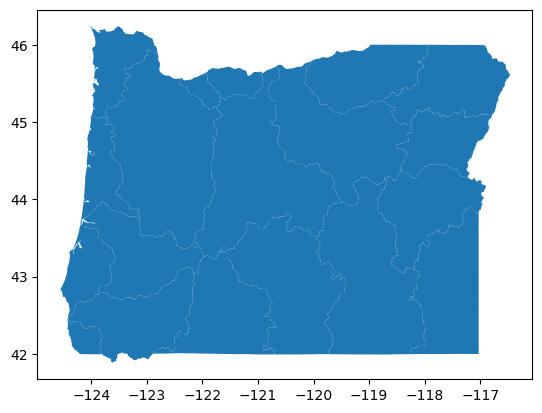

In [20]:
# plot shape info to map
gdfin1.plot()

In [21]:
# create output for Regulatory Area #1 dataframe
df = pd.DataFrame()

columnsList = ['in_ReportingUnitNativeID', 'geometry']
goutdf1 = pd.DataFrame(columns=columnsList, index=gdfin1.index)

goutdf1['in_ReportingUnitNativeID'] =  "or" + gdfin1["BASIN_NUM"].astype(str)  # in_ReportingUnitNativeID needs to match source from above equivlaent datframe
goutdf1['geometry'] = gdfin1['geometry']
goutdf1 = goutdf1.drop_duplicates().reset_index(drop=True)
print(len(goutdf1))
goutdf1.head()

19


,in_ReportingUnitNativeID,geometry
0,or1,"POLYGON ((-123.50594 46.23513, -123.50129 46.2..."
1,or8,"POLYGON ((-117.91887 46.00038, -117.91537 46.0..."
2,or7,"POLYGON ((-119.35598 45.91852, -119.35590 45.9..."
3,or2,"POLYGON ((-122.39995 45.56544, -122.39845 45.5..."
4,or6,"POLYGON ((-120.03311 45.75861, -120.03386 45.7..."


#### Concatenate goutdf shapefile info into single output

In [22]:
# Concatenate Basin & Subbasin DataFrames
frames = [goutdf1] # add geoutdf dataframes here
goutdf = pd.concat(frames).reset_index(drop=True)

print(len(goutdf))
goutdf.head()

19


,in_ReportingUnitNativeID,geometry
0,or1,"POLYGON ((-123.50594 46.23513, -123.50129 46.2..."
1,or8,"POLYGON ((-117.91887 46.00038, -117.91537 46.0..."
2,or7,"POLYGON ((-119.35598 45.91852, -119.35590 45.9..."
3,or2,"POLYGON ((-122.39995 45.56544, -122.39845 45.5..."
4,or6,"POLYGON ((-120.03311 45.75861, -120.03386 45.7..."


## Export Data

In [23]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(outdf.dtypes)

WaDEUUID                                  object
in_Date                                   object
in_Year                                   object
in_OrganizationUUID                       object
in_EPSGCodeCV                             object
in_ReportingUnitName                      object
in_ReportingUnitNativeID                  object
in_ReportingUnitProductVersion            object
in_ReportingUnitTypeCV                    object
in_ReportingUnitUpdateDate                object
in_StateCV                                object
in_Geometry                               object
in_OversightAgency                        object
in_RegulatoryDescription                  object
in_RegulatoryName                         object
in_RegulatoryOverlayNativeID              object
in_RegulatoryStatusCV                     object
in_RegulatoryStatute                      object
in_RegulatoryStatuteLink                  object
in_StatutoryEffectiveDate         datetime64[ns]
in_StatutoryEndDate 

In [24]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(goutdf.dtypes)

in_ReportingUnitNativeID      object
geometry                    geometry
dtype: object


In [25]:
# Export out to CSV.
outdf.to_csv('RawInputData/Pov_Main.zip', compression=dict(method='zip', archive_name='Pov_Main.csv'), index=False)  # The output, save as a zip
goutdf.to_csv('RawInputData/P_Geometry.zip', compression=dict(method='zip', archive_name='P_Geometry.csv'), index=False)  # The output geometry.